In [22]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples

In [23]:
# Uploading the .csv file

from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [24]:
# Reading the .csv file

mall=pd.read_csv("Mall_Customers.csv")

In [25]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
# Scaling the data

scaler=StandardScaler()
scaled_mall=scaler.fit_transform(mall.iloc[:,3:]) # Here we are considering Annual Income and Speading Score

In [28]:
X=scaled_mall

In [29]:
print(X)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

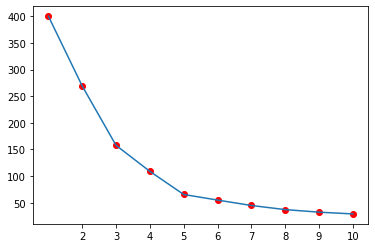

In [30]:
# Now plotting the Elbow-Graph

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='r')
plt.xticks(range(2,11))
plt.show()

In [31]:
# WCSS stands for Within-clusters-sum-of-squares
wcss

[400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.181757826821325,
 32.375253681582876,
 29.076176851244277]

In [32]:
# Now for No. of Clusters =5, we predict to which cluster the data points belong.
clustered=KMeans(n_clusters=5,random_state=10,init='k-means++')
cluster_labels=clustered.fit_predict(X)

In [33]:
cluster_labels

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [34]:
# Now let us create a list which contains the list having varying range of clusters.

range_n_clusters=[3,4,5,6,7]

For n_clusters= 3 The average silhouette_score is : 0.46658474419000145
For n_clusters= 4 The average silhouette_score is : 0.4939069237513199
For n_clusters= 5 The average silhouette_score is : 0.5546571631111091
For n_clusters= 6 The average silhouette_score is : 0.5377141165734254
For n_clusters= 7 The average silhouette_score is : 0.45298064520649645


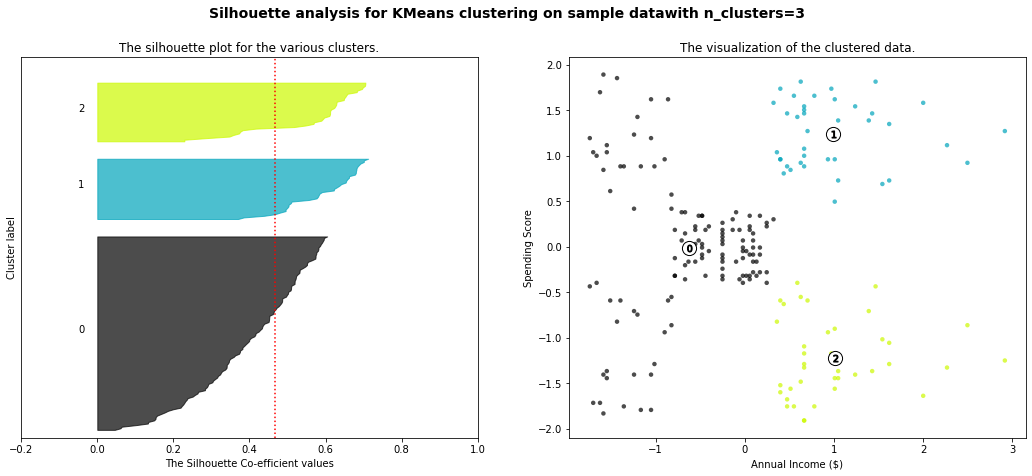

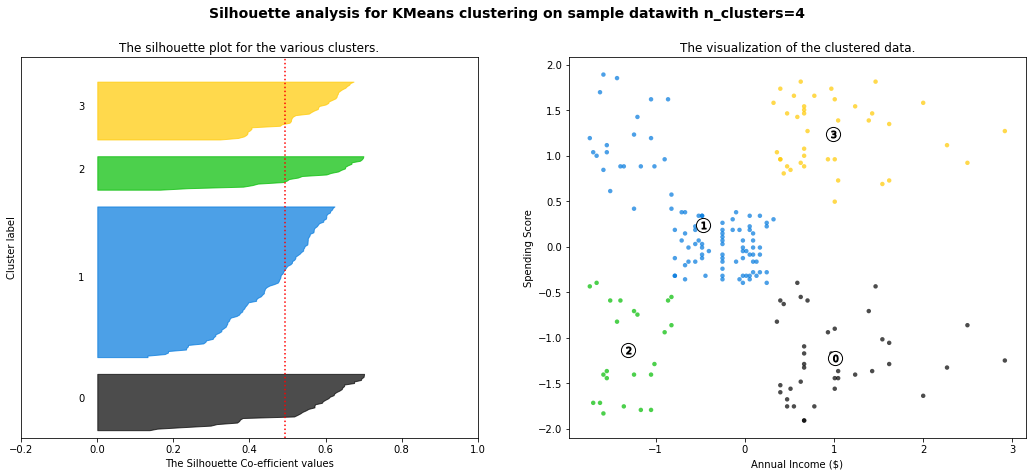

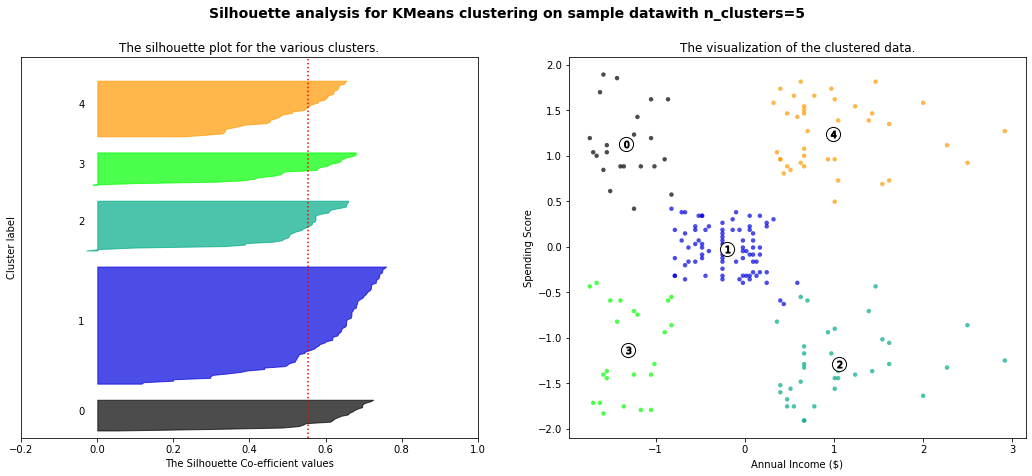

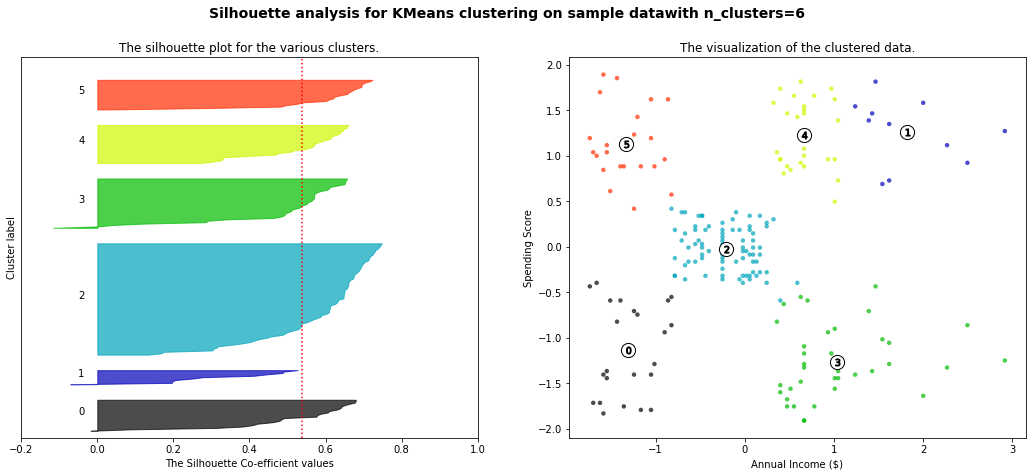

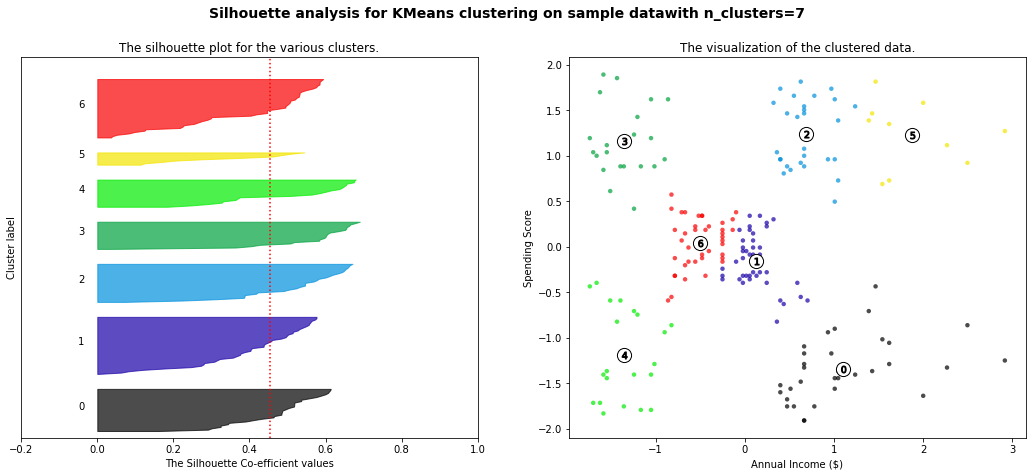

In [35]:
# Now plotting the Silhouette Score along with the Clusters

for n_clusters in range_n_clusters:
  fig,(ax1,ax2)=plt.subplots(1,2) # Create a subplot with 1 row and 2 columns
  fig.set_size_inches(18,7)

  # The 1st subplot is the silhouette plot 
  # The Silhouette co-efficient can range from -1 to +1.
  ax1.set_xlim([-0.1,1])

  # Here (n_clusters+1)*10 is for inserting blank space between Silhouette plots of individual Cluster, to demarcate them correctly.
  ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibilty. 
  clustered=KMeans(n_clusters=n_clusters,random_state=10,init='k-means++')
  cluster_labels=clustered.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into density and separation of the formed clusters
  silhouette_avg=silhouette_score(X,cluster_labels)
  print("For n_clusters=",n_clusters,"The average silhouette_score is :",silhouette_avg)

  # Compute Silhouette score for each sample
  sample_silhouette_values=silhouette_samples(X,cluster_labels)

  y_lower=5
  for i in range(n_clusters):
    # Aggregate the silhouette scores for sample belonging to cluster i, and sort them.
    ith_cluster_silhouette_values=\
      sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i

    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

    # Label the silhouette plots with their cluster number at the middle.
    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    # Compute the new y_lower for next plot.
    y_lower=y_upper+10    # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The Silhouette Co-efficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for the average silhouette for all the values.
  ax1.axvline(x=silhouette_avg,color="red",linestyle=":")

  ax1.set_yticks([])  # Clear all the y-axis labels/ticks
  ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])


  # 2nd plot showing the actual clusters formed.

  colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
  ax2.scatter(X[:,0],X[:,1],marker='.',s=80,lw=0,alpha=0.7,color=colors,edgecolor='k') # Our Feature is Accept and GradRate

  # Labeling the clusters
  centers=clustered.cluster_centers_

  # Draw a white circles ar cluster centers
  ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[0],c[1],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Annual Income ($)")
  ax2.set_ylabel("Spending Score")
  
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data" "with n_clusters=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()